## A1. Data Wrangling (4 marks)

1. Read the ‘Student_List_A2.csv’ file and list the column names.

In [ ]:
import pandas as pd

In [ ]:
#listing the column names
df = pd.read_csv('Student_List_A2.csv')
df.columns

Index(['StudentID', 'Age', 'StudyTimeWeekly', 'Absences', 'ParentalSupport',
       'GPA', 'GradeClass'],
      dtype='object')

2. In this dataset, ‘GradeClass’ column contains the classification of students'
grades based on GPA.
Replace the numerical grade classifications (0, 1, 2, 3, 4) in the ‘GradeClass’
column with their corresponding letter grades ('A', 'B', 'C', 'D', 'F').

In [ ]:
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,1
1,1003,15,4.210570,26,2,0.112602,4
2,1004,17,10.028829,14,3,2.054218,3
3,1005,17,4.672495,17,3,1.288061,4
4,1006,18,8.191219,0,1,3.084184,1


In [ ]:
replace_frame = {0:'A',1:'B',2:'C',3:'D',4:'F'}
df.GradeClass = df.GradeClass.replace(replace_frame)
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B


3. Can you identify any missing values in the columns of this dataset? If so, replace
the missing values with the median value of the relevant column where you find
missing values.

In [ ]:
#checking empty values in each column
empty_values = df.isnull().sum()
empty_values

StudentID           0
Age                 0
StudyTimeWeekly    21
Absences            0
ParentalSupport     0
GPA                 0
GradeClass          0
dtype: int64

In [ ]:
#replacing empty values with median
df['StudyTimeWeekly'] = df['StudyTimeWeekly'].fillna(df['StudyTimeWeekly'].median())
#checking if empty values have been replaced
empty_values = df.isnull().sum()
empty_values

StudentID          0
Age                0
StudyTimeWeekly    0
Absences           0
ParentalSupport    0
GPA                0
GradeClass         0
dtype: int64

4. Identify a data quality problem related to the ‘Absences’ column and delete the
rows that exhibit this problem. Refer to Week 4 for information on data quality
problems.

In [ ]:
#detect missing value
missing_values = df['Absences'].isnull().sum()
missing_values

0

In [ ]:
#detect mistyped data (not integers)
mistyped_data = df['Absences'].apply(lambda x: not isinstance(x, int)).sum()
mistyped_data

0

In [ ]:
#detect negative values
negative_values = df['Absences'].apply(lambda x: x < 0).sum()
negative_values

1

In [ ]:
#filter out negative value
df = df[df['Absences'] >= 0]
#checking if there are still negative values
negative_values = df['Absences'].apply(lambda x: x < 0).sum()
negative_values

0

In [ ]:
#detect outliers
Q1 = df['Absences'].quantile(0.25)
Q3 = df['Absences'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Absences'] < lower_bound) | (df['Absences'] > upper_bound)]
outliers

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
112,1114,16,16.849282,320,1,1.919956,F


In [ ]:
#filter outliers
df = df[(df['Absences'] >= lower_bound) & (df['Absences'] <= upper_bound)]
#checking if there are still outliers
outliers = df[(df['Absences'] < lower_bound) | (df['Absences'] > upper_bound)]
outliers

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass


5. Examine the 'GPA' and 'GradeClass' columns together for additional data quality
issues. Propose an appropriate solution for these issues and resolve them.

In [ ]:
#define a function to check if the GradeClass matches GPA
def check_grade_class(row):
    if row['GPA'] >= 3.5:
        return 'A'
    elif row['GPA'] >= 3.0:
        return 'B'
    elif row['GPA'] >= 2.5:
        return 'C'
    elif row['GPA'] >= 2.0:
        return 'D'
    else:
        return 'F'

# apply the function to create a 'CorrectGradeClass' column
df['CorrectGradeClass'] = df.apply(check_grade_class, axis = 1)

# identify mismatches between the 'GradeClass' and 'CorrectGradeClass'
mismatches = df[df['GradeClass'] != df['CorrectGradeClass']]
mismatches

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass,CorrectGradeClass
2000,3182,15,3.253044,13,1,1.844056,B,F
2001,3183,17,17.086920,25,2,1.305585,C,F
2002,3189,16,5.697054,9,1,2.459805,B,D
2003,3193,16,15.827054,28,1,0.818126,C,F
2004,3195,15,15.615710,26,3,1.174610,A,F
...,...,...,...,...,...,...,...,...
2095,3386,16,1.445434,20,3,1.395631,B,F
2096,3388,18,10.680555,2,4,3.455509,A,B
2097,3390,16,6.805500,20,2,1.142333,C,F
2098,3391,16,12.416653,17,2,1.803297,B,F


In [ ]:
# update 'GradeClass' to match the correct grade based on GPA
df['GradeClass'] = df['CorrectGradeClass']

# drop the 'CorrectGradeClass' helper column
df.drop(columns=['CorrectGradeClass'], inplace=True)

#checking if there are any mismatches left
mismatches = df[df['GradeClass'] != df.apply(check_grade_class, axis=1)]
mismatches

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass


## A2. Supervised Learning (1.5 marks)

1. Explain supervised machine learning, the notion of labelled data, and train and
test datasets.

- supervised machine learning is a method of training a model or algorithm using labelled data to make predictions. The model is trained using a complete dataset of various inputs which are independant variables plus the correct output for each input record. The goal is for the algorithm to learn the relationship between the input and output so that it can make accurate predictions on future data.
- Labelled data us a dataset that contains both the input features and the correct output label. This is important so that the machine learning model is able to learn the relationship between the inputs and the outputs.
- Train data or training dataset refers to a portion of a large dataset which is split out from the main dataset of labelled data (usually about 80%), used to learn patterns and relationship between the inputs and output. During this process, the model continuously update and tune its parameters and coefficients for each input based on the weightage of their effects on the output to increase the accuracy and minimise errors of prediction.
- Test data or testing dataset is a separate set of data that is split form the train data. This data is not used to train the algorithm before and thus is used to evaluate the model's performance on unseen data and how well it generalises to other datasets. It is used to test how well it can predict the output of the test data given the input features and the accuracy score is shown. This is important to test if the machine learning model is having problems like underfitting or overfitting of the training data.

2. Use the wrangled data from A1 and separate the features and the label. Note
that:
o the label, in this case, is the ‘GradeClass’
o studentID is not logically a useful predictor of a student's grade so should
not be used as a feature
o GPA is translated to GradeClass. They both represent the same thing so
GPA should not be used as a feature.
o Use the rest of the features as predictors.

In [ ]:
#importing directories
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GPA,GradeClass
0,1002,18,15.408756,0,1,3.042915,B
1,1003,15,4.210570,26,2,0.112602,F
2,1004,17,10.028829,14,3,2.054218,D
3,1005,17,4.672495,17,3,1.288061,F
4,1006,18,8.191219,0,1,3.084184,B


In [ ]:
#X represent features and Y represent label
X = df.drop(columns = ['StudentID','GPA','GradeClass'],axis = 1)
Y = df['GradeClass']

3. Use the sklearn.model_selection.train_test_split function to split your data for
training and testing (Keep 80% of the data for training).

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## A3. Classification (training) (3 marks)

1. In preparation for classification, your data should be normalised/scaled.

a. Describe what you understand from this need to normalise data (this is in
your Week 7 applied session).|

Different data has different ranges that varies widely. This will affect the function of some machine learning algorithms if no feature scaling is conducted. For instance, some classifiers calculate distance between two points using Euclidean distance. This means if one of the input features has a broader range of valies, the distacne will be heavily influenced by this feature and cause inaccurate predictions. On the other hand, if the range of values is small, the distance will be least affected by the input feature. This, the range of all input features should be normalised so that each feature contribute proportionately in terms of weightage to the final distance.

b. Choose and use the appropriate normalisation functions available in
sklearn.preprocessing and scale the data appropriately.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

2. Use the Support Vector Machine algorithm to build the model.
a. Describe SVM. Again, this is not in your lecture content, you need to do
some self-learning.

Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification tasks, though it can also be applied to regression. The core idea behind SVM is to find a hyperplane (a decision boundary) that best separates different classes in the feature space.

b. In SVM, there is something called the kernel. Explain what you
understand from it.

SVM can handle non-linearly separable data through the use of kernel functions. A kernel transforms the original feature space into a higher-dimensional space where a linear hyperplane can effectively separate the classes. Common kernels include:
Linear Kernel: Used for linearly separable data.
Polynomial Kernel: Captures polynomial relationships between features.
Radial Basis Function (RBF) Kernel: Effective for data that is not linearly separable.

c. Write the code to build a predictive SVM model using your training
dataset. (Note: You are allowed to engineer or remove features as you
deem appropriate)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
model = svm.SVC(kernel='linear', C=1.0)

In [ ]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

3. Repeat Task A3.3.c by using another classification algorithm such as Decision
Tree or Random Forest algorithms instead of SVM.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

## A4. Classification (prediction) (3 marks)

1. Using the testing dataset you created in Task A2.3 above, conduct the
prediction for the ‘GradeClass’ (label) using the two models built by SVM and
your other classification algorithm in Task A3.3.

In [ ]:
#Prediction using SVM model (lower case y)
y_pred = model.predict(X_test)
y_pred

array(['F', 'B', 'F', 'F', 'D', 'D', 'F', 'D', 'C', 'C', 'D', 'F', 'B',
       'F', 'F', 'C', 'F', 'D', 'F', 'D', 'C', 'F', 'D', 'F', 'D', 'C',
       'F', 'F', 'F', 'B', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'C', 'C', 'F', 'C', 'D', 'B', 'D', 'F', 'D', 'D', 'F',
       'F', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'D', 'B', 'F', 'B',
       'F', 'C', 'F', 'B', 'F', 'F', 'F', 'D', 'F', 'F', 'B', 'C', 'D',
       'F', 'F', 'F', 'C', 'C', 'F', 'D', 'F', 'C', 'F', 'F', 'F', 'B',
       'F', 'C', 'F', 'F', 'F', 'D', 'F', 'F', 'D', 'F', 'C', 'F', 'F',
       'F', 'F', 'F', 'C', 'B', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'C',
       'B', 'C', 'F', 'C', 'F', 'F', 'F', 'F', 'C', 'C', 'F', 'B', 'F',
       'C', 'C', 'D', 'F', 'C', 'D', 'C', 'F', 'C', 'C', 'C', 'C', 'F',
       'F', 'F', 'F', 'F', 'D', 'D', 'F', 'C', 'C', 'F', 'F', 'F', 'F',
       'F', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'F',
       'F', 'F', 'C', 'D', 'D', 'B', 'C', 'D', 'F', 'B', 'F', 'F

In [ ]:
#Prediction using Decision Tree Model (capital Y)
Y_pred = classifier.predict(X_test)
Y_pred

array(['F', 'A', 'F', 'F', 'D', 'D', 'D', 'D', 'C', 'D', 'C', 'F', 'B',
       'F', 'F', 'D', 'F', 'D', 'F', 'D', 'C', 'F', 'C', 'F', 'C', 'B',
       'F', 'F', 'F', 'A', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F',
       'F', 'F', 'C', 'C', 'F', 'D', 'D', 'B', 'C', 'F', 'D', 'F', 'F',
       'F', 'C', 'F', 'F', 'F', 'F', 'F', 'F', 'C', 'C', 'C', 'F', 'C',
       'F', 'C', 'F', 'C', 'D', 'F', 'F', 'F', 'F', 'F', 'A', 'C', 'D',
       'F', 'D', 'F', 'C', 'C', 'F', 'C', 'F', 'C', 'F', 'F', 'F', 'C',
       'F', 'C', 'F', 'F', 'F', 'D', 'F', 'F', 'C', 'F', 'D', 'F', 'D',
       'F', 'F', 'F', 'C', 'B', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'D',
       'B', 'B', 'F', 'C', 'F', 'F', 'D', 'F', 'B', 'D', 'F', 'B', 'F',
       'C', 'C', 'D', 'F', 'C', 'C', 'C', 'F', 'C', 'C', 'D', 'C', 'F',
       'F', 'F', 'F', 'F', 'C', 'D', 'F', 'C', 'D', 'F', 'F', 'F', 'F',
       'F', 'C', 'F', 'D', 'F', 'F', 'F', 'F', 'F', 'F', 'D', 'C', 'D',
       'F', 'F', 'B', 'F', 'D', 'A', 'D', 'C', 'F', 'B', 'F', 'D

2. Display the confusion matrices for both models (it should look like a 5x5 matrix).
Unlike the lectures, where it is just a 2x2, you are now introduced to a multi-class
classification problem setting.

In [ ]:
#Confusion matrix of SVM Model
cm_svm = confusion_matrix(Y_test, y_pred)
cm_svm

array([[  0,  18,   0,   0,   0],
       [  0,  19,  23,   1,   0],
       [  0,   9,  40,   9,   1],
       [  0,   0,  13,  46,  19],
       [  0,   0,   0,   8, 214]], dtype=int64)

In [ ]:
#Confusion matrox of Decision Tree Classification Model
from sklearn.metrics import confusion_matrix
cm_dtc = confusion_matrix(Y_test, Y_pred)
cm_dtc

array([[  8,   8,   2,   0,   0],
       [  1,  16,  20,   6,   0],
       [  3,  12,  29,  13,   2],
       [  0,   0,  16,  43,  19],
       [  0,   0,   1,  17, 204]], dtype=int64)

3. Compare the performance of SVM and your other classifier and provide your
justification on which one performed better.

In [ ]:
#Comparing accuracy
def find_accuracy(cm):
    true_positives = sum(cm[i, i] for i in range(len(cm)))
    total_samples = cm.sum()
    accuracy = true_positives/total_samples
    return accuracy

print(find_accuracy(cm_svm),find_accuracy(cm_dtc))

0.7595238095238095 0.7142857142857143


- from the above comparison in accuracy between the confusion matrix of svm model and decision tree model, the accuracy of svm model is 0.760 while decision tree model is 0.714
- The Support Vector Machine (SVM) model has an accuracy of 0.760, which means it correctly classifies 76% of the samples.
- The Decision Tree model, on the other hand, has an accuracy of 0.714, meaning it correctly classifies 71.4% of the samples.
- The accuracy of svm model is higher than decision tree model which means svm model performs better than decision model.
- The SVM model’s higher accuracy suggests it better generalizes to unseen data
- However the Decision Tree model’s interpretability might still be a better choice in specific use cases

## A5. Independent evaluation (Competition ) (2.5 marks)

1. Read the Student_List_A2_Submission.csv file and use the best model you
built earlier to predict the ‘GradeClass for the students in this file.

In [ ]:
df = pd.read_csv('Student_List_A2_Submission.csv')
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport
0,5000,16,13.274090,27,1
1,5001,17,16.926360,6,2
2,5002,15,4.225258,15,3
3,5003,16,18.839829,17,3
4,5004,15,9.075075,6,2


2. Unlike the previous section in which you have a testing dataset where you know
the ‘GradeClass’ and will be able to test for the accuracy, in this part, you don’t
have a ‘GradeClass’ and you have to predict it and submit the predictions along
with other required submission files.

In [ ]:
X = df.drop(columns = 'StudentID', axis = 1)
X = sc.fit_transform(X)
Y_pred = model.predict(X)
df['GradeClass'] = Y_pred
df.head()

,StudentID,Age,StudyTimeWeekly,Absences,ParentalSupport,GradeClass
0,5000,16,13.274090,27,1,F
1,5001,17,16.926360,6,2,C
2,5002,15,4.225258,15,3,F
3,5003,16,18.839829,17,3,D
4,5004,15,9.075075,6,2,C


In [ ]:
df = df[['StudentID','GradeClass']]
df.head()

,StudentID,GradeClass
0,5000,F
1,5001,C
2,5002,F
3,5003,D
4,5004,C


In [ ]:
df.shape

(161, 2)

In [ ]:
df.to_csv('predicted_value_submission.csv', index = False)

## B1. Selection of a Dataset with missing data and Clustering (4 marks)

We have demonstrated a k-means clustering algorithm in week 7. Your task in this part
is to find an interesting dataset and apply k-means clustering on it using Python. For
instance, Kaggle is a private company which runs data science competitions and
provides a list of their publicly available datasets: https://www.kaggle.com/datasets

1. Select a suitable dataset that contains some missing data and at least two
numerical features. Please note you cannot use the same data set used in the
applied sessions/lectures in this unit. Please include a link to your dataset in
your report. You may wish to:
● provide the direct link to the public dataset from the internet, or
● place the data file in your Monash student - google drive and provide its
link in the submission.

Link to dataset: https://openmv.net/info/travel-times

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('travel-times.csv')
df.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All,Comments
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No,NaN
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No,NaN
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No,NaN
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No,NaN
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No,NaN


In [ ]:
df = df.drop(columns = 'Comments', axis = 1) # drop unimportant comment column
df.head()

,Date,StartTime,DayOfWeek,GoingTo,Distance,MaxSpeed,AvgSpeed,AvgMovingSpeed,FuelEconomy,TotalTime,MovingTime,Take407All
0,1/6/2012,16:37,Friday,Home,51.29,127.4,78.3,84.8,NaN,39.3,36.3,No
1,1/6/2012,08:20,Friday,GSK,51.63,130.3,81.8,88.9,NaN,37.9,34.9,No
2,1/4/2012,16:17,Wednesday,Home,51.27,127.4,82.0,85.8,NaN,37.5,35.9,No
3,1/4/2012,07:53,Wednesday,GSK,49.17,132.3,74.2,82.9,NaN,39.8,35.6,No
4,1/3/2012,18:57,Tuesday,Home,51.15,136.2,83.4,88.1,NaN,36.8,34.8,No


In [ ]:
df.shape

(205, 12)

2. Perform wrangling on the dataset to handle/treat the missing data and explain
your procedure

In [ ]:
missing_values_per_column = df.isnull().sum()
missing_values_per_column

Date               0
StartTime          0
DayOfWeek          0
GoingTo            0
Distance           0
MaxSpeed           0
AvgSpeed           0
AvgMovingSpeed     0
FuelEconomy       17
TotalTime          0
MovingTime         0
Take407All         0
dtype: int64

- The first step is to find the total number of empty values in each column
- Looks like only FuelEconomy column has empty values

In [ ]:
df = df.dropna()  # Removes rows with any missing values
df.shape

(188, 12)

- Since there are only 17 rows with missing values, I decided to delete the rows
- Since there is only one column with empty values, I use the dropna() function to remove all rows with missing values

3. Perform k-means clustering, choosing two numerical features in your dataset
and create k clusters using Python (k>=2)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [ ]:
df = df[['Distance','AvgMovingSpeed']]
df.head()

,Distance,AvgMovingSpeed
6,51.37,87.3
7,49.01,85.9
8,52.91,88.3
9,51.17,78.1
10,49.15,81.4


4. Visualise the data as well as the results of the k-means clustering, and describe
your findings about the identified clusters.

Text(0, 0.5, 'Average Moving Speed')

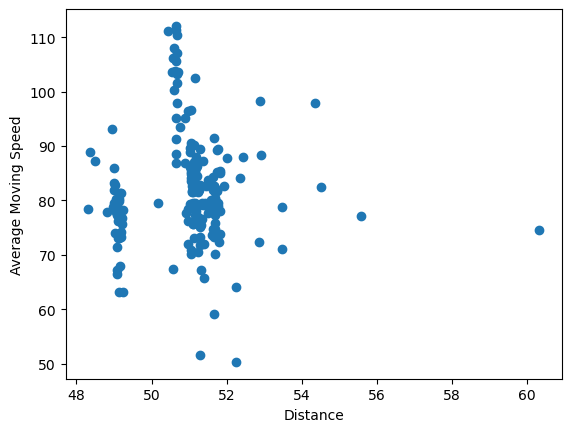

In [ ]:
#Visualise the dataset (Distance vs AvgMovingSpeed)
plt.scatter(x=df['Distance'],y=df['AvgMovingSpeed'])
plt.xlabel('Distance')
plt.ylabel('Average Moving Speed')

In [ ]:
# set  to cluster the dataset into two subgroups
kmeans = KMeans(n_clusters=2).fit(
df[['Distance','AvgMovingSpeed']])

C:\Users\Honor\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
# Look at the outputs: Two cluster centers
kmeans.cluster_centers_
# Look at the outputs: Cluster labels
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1])

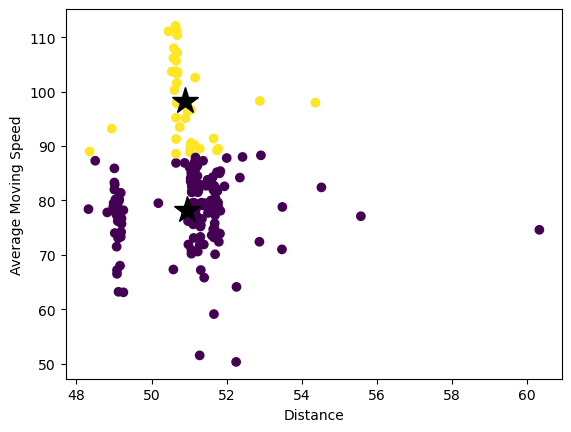

In [ ]:
# Visualise the output labels
plt.scatter(
x=df['Distance'],
y=df['AvgMovingSpeed'],
c=kmeans.labels_)
# Visualise the cluster centers (black stars)
plt.plot(
kmeans.cluster_centers_[:,0],
kmeans.cluster_centers_[:,1],
'k*',
markersize=20
)
plt.xlabel('Distance')
plt.ylabel('Average Moving Speed')
plt.show()

- There are two clusters formed by k-means clustering, visualized by the two distinct color groups: one in yellow and the other in purple.
- One group (purple) is more concentrated towards lower speeds and shorter distances.
- People of this group might be those who travel inside their own town roads which has more twist and turns and traffic lights
- This causes them to have lower average moving speeds and shorter distances travelled
- The other group (yellow) is more focused on higher speeds and slightly higher distances.
- These people might be those who travel in highways which normally has higher speed limits, less traffic lights and people travel further in distance